In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fn = '/Users/dieterchvatal/prog/python3/statemachine/data/1486152/1486152_1_1649055043_run2.hdf'
tdata = pd.read_hdf(fn,'data')
tcslice = ['Exhaust_TempCyl*'.replace('*',f"{i+1:02d}") for i in range(24)]
tslice = ['Power_PowerAct','Exhaust_TempCylMin','Exhaust_TempCylMax']#+tcslice
tslice = ['Exhaust_TempCylMin','Exhaust_TempCylMax']+['Exhaust_TempCyl*'.replace('*',f"{i+1:02d}") for i in range(24)]
tdata[tslice]

,Exhaust_TempCylMin,Exhaust_TempCylMax,Exhaust_TempCyl01,Exhaust_TempCyl02,Exhaust_TempCyl03,Exhaust_TempCyl04,Exhaust_TempCyl05,Exhaust_TempCyl06,Exhaust_TempCyl07,Exhaust_TempCyl08,...,Exhaust_TempCyl15,Exhaust_TempCyl16,Exhaust_TempCyl17,Exhaust_TempCyl18,Exhaust_TempCyl19,Exhaust_TempCyl20,Exhaust_TempCyl21,Exhaust_TempCyl22,Exhaust_TempCyl23,Exhaust_TempCyl24
0,49.000,53.000,51.000,51.000,50.000,51.000,52.000,52.000,51.000,50.000,...,50.000,51.000,52.000,52.000,51.000,50.000,49.000,50.000,53.000,52.000
1,51.502,55.502,51.935,52.668,52.805,54.336,54.805,54.502,52.870,52.502,...,52.502,52.870,53.870,54.805,53.805,52.805,51.805,53.336,55.502,54.805
2,52.000,56.000,52.842,54.280,55.105,56.920,57.105,55.960,55.105,53.960,...,54.280,54.684,55.684,57.105,55.684,55.105,54.105,55.280,57.280,57.105
3,53.630,60.075,54.545,57.654,58.654,61.063,60.654,58.545,58.654,56.654,...,57.054,57.436,58.545,60.763,58.654,58.654,57.545,58.063,60.654,60.654
4,58.035,66.649,59.000,63.000,64.000,68.000,66.000,63.000,64.000,62.000,...,63.000,61.000,63.000,67.000,64.000,64.000,62.000,65.000,66.000,66.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,561.000,566.000,565.000,564.000,563.000,565.000,563.000,563.000,564.000,565.000,...,564.000,565.000,563.000,565.000,565.000,565.000,565.000,565.000,564.000,561.000
431,561.000,566.000,565.000,564.000,563.000,565.000,563.000,563.000,564.000,565.000,...,564.000,565.000,563.000,565.000,565.000,565.000,565.000,565.000,564.000,561.000
432,561.000,566.000,565.000,564.000,563.000,565.000,563.000,563.000,564.000,565.000,...,564.000,565.000,563.000,565.000,565.000,565.000,565.000,565.000,564.000,561.000
433,561.000,566.000,565.000,564.000,563.000,565.000,563.000,563.000,564.000,565.000,...,564.000,565.000,563.000,565.000,565.000,565.000,565.000,565.000,564.000,561.000


<AxesSubplot:>

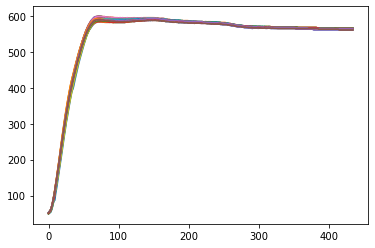

In [40]:
res= {}

# ExhaustTempMax            
point = tdata['Exhaust_TempCylMax'].idxmax()
if point == point: # test for not NaN
    datapoint = tdata.loc[point]
    #te = list(datapoint[tcslice])
    te = np.array(datapoint[tcslice])
    tmax = max(te); 
    tmax_pos = list(np.where(te==tmax)[0]) #te.index(tmax)
    tmin = min(te); 
    tmin_pos = np.where(te==tmin) #te.index(tmin)
    #tmax_org = tdata.at[datapoint.name,'Exhaust_TempCylMax']
    #tmin_org = tdata.at[datapoint.name,'Exhaust_TempCylMin']
    tspread = tmax - tmin
    tpow  = tdata.at[datapoint.name,'Power_PowerAct']
    res.update({'ExhTempCylMax':tmax,
                #'ExhTempCylMaxOrg':tmax_org,
                'ExhTempCylMaxPos':tmax_pos,
                'ExhTempCylMin_at_Max':tmin,
                #'ExhTempCylMin_at_Max_org':tmin_org,
                'ExhTempCylMin_at_Max_Pos':tmin_pos,
                'ExhSpread_at_Max':tspread,  
                'Power_at_ExhTempCylMax':tpow })

#ExhaustTempSpreadMax            
tdata['spread'] = tdata['Exhaust_TempCylMax'] - tdata['Exhaust_TempCylMin']
point = tdata['spread'].idxmax()
if point == point:
    sdatapoint = tdata.loc[point]
    ste = np.array(sdatapoint[tcslice])
    stmax = max(ste); 
    stmax_pos = np.where(ste==stmax) #ste.index(stmax)
    stmin = min(ste); 
    stmin_pos = np.where(ste==stmin) #ste.index(stmin)
    spreadmax = tdata.at[sdatapoint.name,'spread']
    spreadpow = tdata.at[sdatapoint.name,'Power_PowerAct']
    res.update({'ExhSpreadMax':spreadmax,
                'ExhTempCylMax_at_Spread_Max_':stmax,
                'ExhTempCylMax_at_Spread_Max_Pos':stmax_pos,
                'ExhTempCylMin_at_Spread_Max':stmin,
                'ExhTempCylMin_at_Spread_Max_Pos':stmin_pos,
                'Power_at_ExhSpreadMax':spreadpow })

tdata[tslice].plot(legend=False)

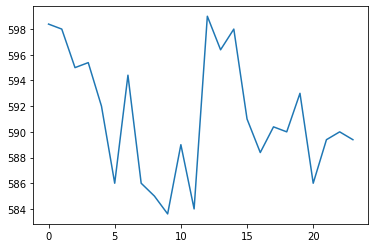

In [41]:
te = list(datapoint[tcslice])
plt.plot(te)

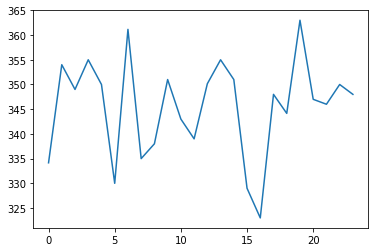

In [42]:
ste = list(sdatapoint[tcslice])
plt.plot(ste)

In [43]:
#tmax = max(te); tmin = min(te)
tmax, te.index(tmax), tmin, te.index(tmin), stmax, ste.index(stmax), stmin, ste.index(stmin)

(599.0, 12, 583.611, 9, 363.0, 19, 323.0, 16)

In [44]:
res

{'ExhTempCylMax': 599.0,
 'ExhTempCylMaxPos': [12],
 'ExhTempCylMin_at_Max': 583.611,
 'ExhTempCylMin_at_Max_Pos': (array([9]),),
 'ExhSpread_at_Max': 15.38900000000001,
 'Power_at_ExhTempCylMax': 2122.717,
 'ExhSpreadMax': 39.801000000000045,
 'ExhTempCylMax_at_Spread_Max_': 363.0,
 'ExhTempCylMax_at_Spread_Max_Pos': (array([19]),),
 'ExhTempCylMin_at_Spread_Max': 323.0,
 'ExhTempCylMin_at_Spread_Max_Pos': (array([16]),),
 'Power_at_ExhSpreadMax': 864.076}

In [24]:
list(res.keys())

['ExhTempCylMax',
 'ExhTempCylMaxPos',
 'ExhTempCylMin_at_Max',
 'ExhTempCylMin_at_Max_Pos',
 'ExhSpread_at_Max',
 'Power_at_ExhTempCylMax',
 'ExhSpreadMax',
 'ExhTempCylMax_at_Spread_Max_',
 'ExhTempCylMax_at_Spread_Max_Pos',
 'ExhTempCylMin_at_Spread_Max',
 'ExhTempCylMin_at_Spread_Max_Pos',
 'Power_at_ExhSpreadMax']